#**MULTI-TARGET REGRESSION**

##**INTRODUCTION**

When multiple dependent variables exist in a
regression model, this task is called as multi-target regression.
In this case, a multi-output regressor is employed to learn the
mapping from input features to output variables jointly. In this
study, multi-target regression technique is implemented for
quality prediction in a mining process to estimate the amount
of silica and iron concentrates in the ore at the end of the
process.

In this study, two inter-dependent single target regression
tasks are transformed into a multiple output regression
problem for quality prediction in a mining process. 

In the pervious models have been conducted to
estimate silica concentrate with or without taking iron
concentrate as input parameter. In this aspect, the problem is
a single-target regression problem. However, this  study that focuses on the
estimation of both iron and silica concentrates
simultaneously as output variables. We compared different
multi-target regressors that use Random Forest, AdaBoost, XGBOOST ,RIDGE and Decision Tree algorithms separately in the background. Coefficient of determination (R2) metric and MSE was used to evaluate predictive performance of the regression methods for the mentioned data.

##**METHODS TO IMPLEMENT MTR**
**Problem transformation methods**

1. These methods are mainly based on transforming the multi-output regression problem into single-target problems, then building a model for each target, and finally
concatenating all the d predictions. The main drawback of these methods is that the
relationships among the targets are ignored, and the targets are predicted independently, which may affect the overall quality of the predictions.

2. **Regressor chains (RC) method**

   It is inspired by the recent multi-label chain classifiers 31. RC is another problem transformation method, based on the idea of chaining
single-target models. The training of RC consists of selecting a random chain (i.e.,
permutation) of the set of target variables, then building a separate regression model
for each target following the order of the selected chain.

3. **Single traget model**
  
  output variables are estimated
independently and potential relations between them cannot
be exploited

##**RELATED WORKS**

https://ieeexplore.ieee.org/abstract/document/8907120Y

The paper focus on inherent multiregressor models and concluded to it is best to predict silica and iron concentrate at the same time.  

##**NEW METHODS**
https://machinelearningmastery.com/multi-output-regression-models-with-python/


My work focus on following implementation:

1. To see whether the %silica concentrate can be predicted without iron concentrate and result showed us it is not good to predict silica concentrate withou iron concentrate . Hence, to solve the problem we can implement the multitarget regression method to predict both target variables at same time.

2. To try differnt models which is not inherent multitarget regression models like Randomforest,Ridge,Xgboost

3. To finalize the best model with R2 as well as MSE metric.

# **LIBARY**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
import joblib
import sklearn.preprocessing import StandardScalar

# **FUNCTION-1**
 
**PRE-PROCESSING**
    
    1. MISSING VALUE 
    2. NULL VALUE 
    3. CHANGING INTO CORRECT FORMAT
    4. SCALING

## **CALCULATION**

ONE HR = 3600 SECS

SAMPLES AT 20 SECONDS

LET US HAVE ONE RECORD AT END OF 20 SECS

SO, 3600/20 = 180 

WHICH MEANS WE GET 180 RECORDS FOR ONE HOUR SO WE NEED TO WE FIND THE NUMBER OF RECORDS = 180 AND IF IT EQUAL WE ARE LUCKY TO COCNLUDE THERE IS NO MISSING VALUE ELSE WE NEED TO FILL THOSE MISSIN VALUES


# WE DONT TREAT THE CORRELATION FEATURES SINCE OUR TASK IS BASED ON CORRELATION ON FEATURES WE DONT ELIMINATE THEM SIMPLY .

WE TREAT THEM WHILE DOING MODELING OF DATA

#**FEATURE ENGINEERING**

**Rounding**

Often when dealing with continuous numeric attributes like proportions or percentages, we may not need the raw values having a high amount of precision. Hence it often makes sense to round off these high precision percentages into numeric integers.The data is being converted to proper percentages

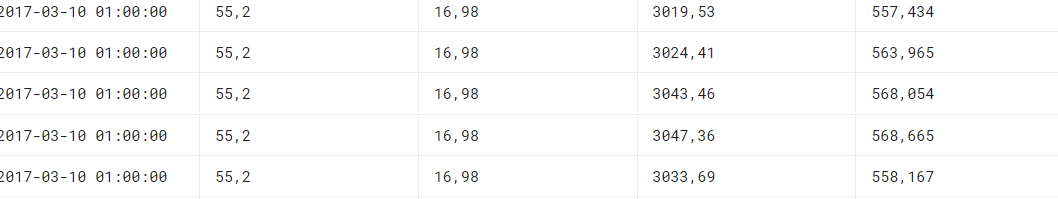
THE RAW DATA IS SHOWN ABOVE

THE ROUND OFF DATA IS SHOWN BELOW

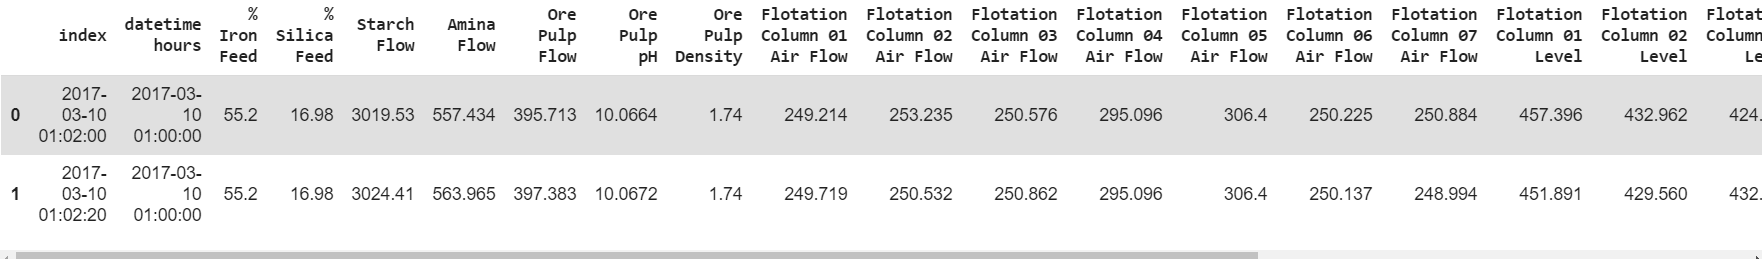


#**REFERENCES**

1. assignment donors dataset-preprocessing
2. https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/
 
 https://www.kaggle.com/juejuewang/handle-missing-values-in-time-series-for-beginners

3. https://machinelearningmastery.com/multi-output-regression-models-with-python/


In [0]:
def final_fun_1(X):
  d1=[]
  if X.shape==(25,):
     X1=X.reshape(-1,1)
     x=np.frompyfunc(lambda x: x.replace(',','.'),1,1)(X1[2:25]).astype(float)
    
     unique, counts = np.unique(x, return_counts=True)
     d1.append(unique)
     unique, counts = np.unique(d1, return_counts=True)
     d=dict(zip(unique, counts))
     for key, value in d.items(): 
         if value==180 and  np.isnan(x):
            x.remove(x)
     features_x = scale_features_std.fit_transform(x[:21].reshape(1,-1))
     from_joblib = joblib.load('/content/drive/My Drive/ADABOOST-MTR.pkl') 
     y_pred=from_joblib.predict(features_x) 
     return y_pred
  else:
   
     x=np.frompyfunc(lambda x: x.replace(',','.'),1,1)(X[:,2:23]).astype(float)
     for i in range(len(x)):
           unique, counts = np.unique(x[i][0], return_counts=True)
           d1.append(unique)
     unique, counts = np.unique(d1, return_counts=True)
     d=dict(zip(unique, counts))
     for key, value in d.items(): 
         if value==180 and  np.isnan(x[i]):
            x.remove(x[i])
     features_x = scale_features_std.fit_transform(x[:,:21])
     from_joblib = joblib.load('/content/drive/My Drive/ADABOOST-MTR.pkl') 
     y_pred=from_joblib.predict(features_x) 
     return y_pred

# **FUNTION-2**

Finding R2_METRIC AND MSE 

In [0]:
def final_fun_2(X,y):
  d1=[]
  if X.shape==(25,):
     X1=X.reshape(-1,1)
     x=np.frompyfunc(lambda x: x.replace(',','.'),1,1)(X1[2:25]).astype(float)
     y=np.frompyfunc(lambda x: x.replace(',','.'),1,1)(X1[23:25]).astype(float) 
     unique, counts = np.unique(x, return_counts=True)
     d1.append(unique)
     unique, counts = np.unique(d1, return_counts=True)
     d=dict(zip(unique, counts))
     for key, value in d.items(): 
         if value==180 and  np.isnan(x):
            x.remove(x)
     features_x = scale_features_std.fit_transform(x[:21].reshape(1,-1))
     from_joblib = joblib.load('/content/drive/My Drive/ADABOOST-MTR.pkl') 
     y_pred=from_joblib.predict(features_x) 
     y_pred=y_pred.reshape(-1,1)
     r2_metric=r2_score(y,y_pred)
     mse=mean_squared_error(y,y_pred) 
     return r2_metric,mse 
  else:
     y=np.frompyfunc(lambda x: x.replace(',','.'),1,1)(y).astype(float)
     x=np.frompyfunc(lambda x: x.replace(',','.'),1,1)(X[:,2:23]).astype(float)
     for i in range(len(x)):
           unique, counts = np.unique(x[i][0], return_counts=True)
           d1.append(unique)
     unique, counts = np.unique(d1, return_counts=True)
     d=dict(zip(unique, counts))
     for key, value in d.items(): 
         if value==180 and  np.isnan(x[i]):
            x.remove(x[i])
     features_x = scale_features_std.fit_transform(x[:,:21])
     from_joblib = joblib.load('/content/drive/My Drive/ADABOOST-MTR.pkl') 
     y_pred=from_joblib.predict(features_x) 
     r2_metric=r2_score(y,y_pred)
     mse=mean_squared_error(y,y_pred)  
     return r2_metric,mse

In [0]:
df=pd.read_csv('/content/drive/My Drive/prep_time')
X=df.values

##**PREDICTION**

In [0]:
y_pred=final_fun_1(X)

##**EVALUATION-METRIC**

In [0]:
r2_score,mse=final_fun_2(X,X[:,23:25])

In [0]:
print("R2 metric is",r2_score)
print("*"*100)
print("MSE value is",mse)

R2 metric is 0.970523270885995
****************************************************************************************************
MSE value is 0.03709564508317323


##**PLOTS**

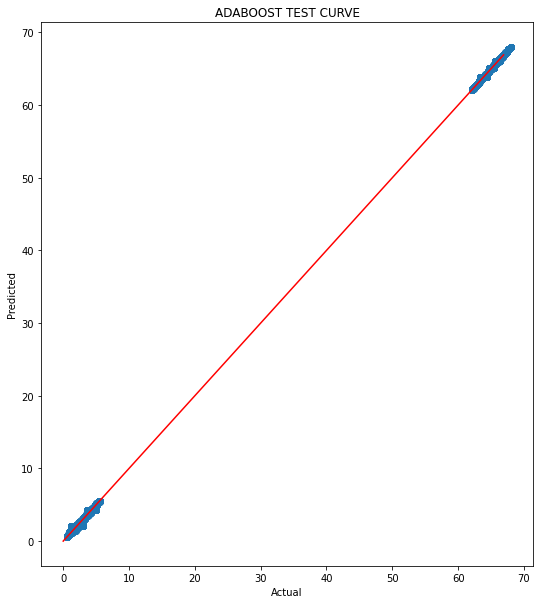

In [0]:
#https://www.kaggle.com/plbescond/quality-prediction-r-0-81-mse-0-12
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(131)
ax.set(title="ADABOOST TEST CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y1,a)
ax.plot([0,max(y1[0])], [0,max(a[0])], color='r')
fig.show()

## **METRIC ANALYSIS**



#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2#sklearn.metrics.r2_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

**R2 SCORE**

Acoording to literature, the r2 score is good when it is closer to 1  and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

TRAIN R2 is  so closer to 0 and TEST r2 is also  to 0 and hence inorder to get better result , we must try other models 

**MSE VALUE**

A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.



The MSE value and R2 score value is better for the model.


## **PLOTS ANALYSIS**


1.  MTR MODEL

   In  curve, the points tend to overlay on the line and in both iron and silica the points are overfalling on regression line

   In  curve, the models are able to predict iron concetrate and are  able to predict the silica better in the same way for iron concentrate



## **CONCLUSION**

AdaBoost model can be used for quality prediction. It
shows the scatter plot of the model that predicts two target
variables: silica and iron concentrates by AdaBoost regressor.



#**OVERALL COMPARSION**

In [0]:
#https://pypi.org/project/PrettyTable/-- for representation of data 
#https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists-- to add the rows in table 
from prettytable import PrettyTable
x = PrettyTable(border=True, header=True, padding_width=15)
x.field_names = ["MODEL1", "R2","MSE"]
x.add_row(["ADABOOST",970523270885995,0.03203487819099303])
print(x)

+--------------------------------------+---------------------------------------------+-------------------------------------------------+
|                MODEL1                |                      R2                     |                       MSE                       |
+--------------------------------------+---------------------------------------------+-------------------------------------------------+
|               ADABOOST               |               970523270885995               |               0.03203487819099303               |
+--------------------------------------+---------------------------------------------+-------------------------------------------------+


#**RESULTS IN RESERACH PAPER VS OUR PAPER**
image.png

##**OUR RESULTS**

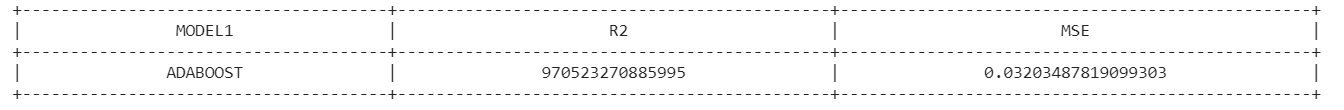


##**PLOTS IN PAPER VS OUR RESULTS**(ADABOOST ALONE)

                  **PLOTS IIN PAPER**

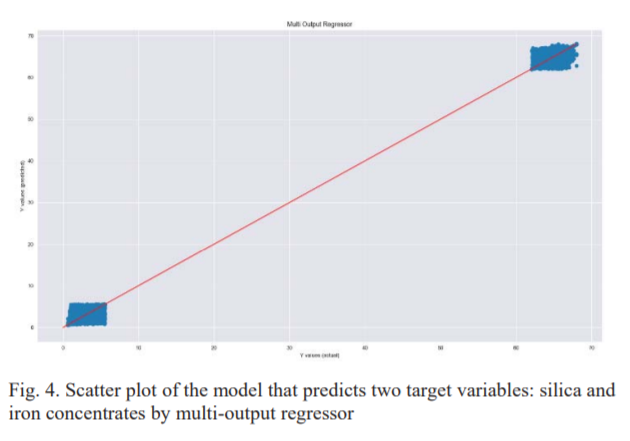

##**PLOTS OBTAINED**

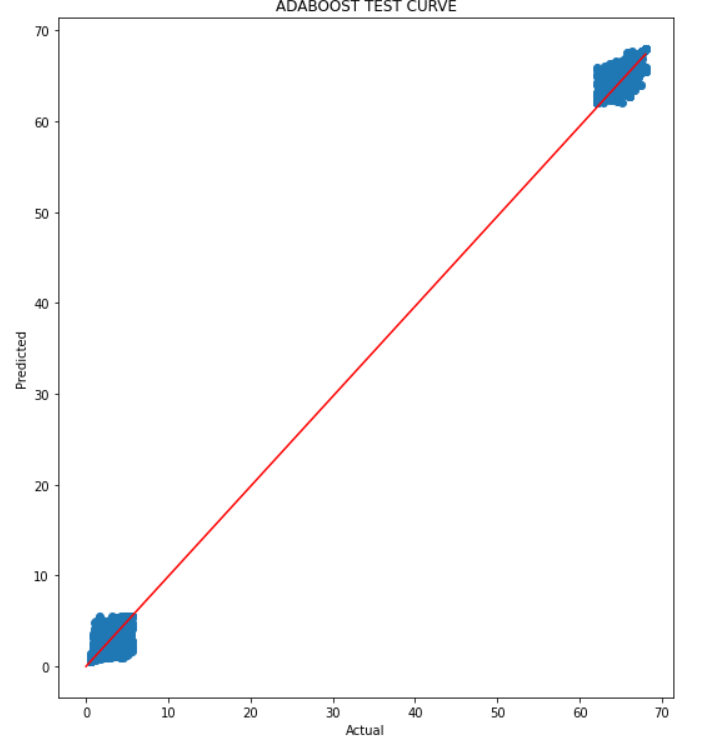

#**SUMMARY**



The experimental results show that AdaBoost regressor
clearly provided higher coefficient of determination value
than other algorithms. This is probably because AdaBoost is
an ensemble method, which generally provides better
accuracies than an individual model by averaging the
decisions of several predictors. In addition, AdaBoost is an
iterative algorithm, each time reweighting the instances in the
dataset to focus the next classifier on incorrectly classified
ones. By this way, it constructs a strong classifier from a
combination of weak classifiers. 

Our Results match with research paper results . In reerach paper also ADABOOST is the best model likewise in our study also our best model is ADABOOST.

The experimental results demonstrate the superiority of AdaBoost .





In this study, a multi-target regression problem is handled
to predict quality in a mining process. The aim is to construct
a robust model that simultaneously estimates the amount of
silica and iron concentrates in the ore. Several approaches are
implemented and compared to be able to handle more than
one target variable. We tried to observe the performance of a
multi target regression approach when target features are
highly correlated. At the end, it is noticed that this approach
can also be efficient in manufacturing data when a related
attribute is not given to the algorithm as an input parameter.
Instead, that feature can also be evaluated as an output
variable by being added to the existing target feature. We
have observed that this alteration did not create an adverse
effect on the regression performance. 